In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/DL-Assignment

/content/drive/My Drive/DL-Assignment


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2020-12-02 06:19:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   775KB/s    in 0.3s    

2020-12-02 06:19:40 (775 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [ ]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
replace readme? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!mv SMSSpamCollection dataset.csv

In [ ]:
%cd /content/drive/My Drive/DL-Assignment

/content/drive/My Drive/DL-Assignment


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-12-02 06:20:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-02 06:20:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-02 06:20:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!wget http://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip

--2020-12-02 06:28:09--  http://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip [following]
--2020-12-02 06:28:10--  https://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.twitter.27B.zip [following]
--2020-12-02 06:28:10--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting respon

In [ ]:
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  


In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
seed = 42
np.random.seed(seed)

In [ ]:
df = pd.read_csv('dataset.csv',sep='\t',names=['Label','Text'])

In [ ]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


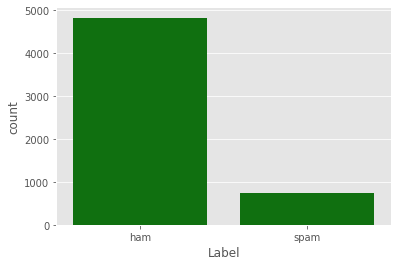

In [ ]:
plt.style.use('ggplot')
sns_plot = sns.countplot(df['Label'], data=df, color="g")
sns_plot.get_figure().savefig('Spam-Ham-Distribution.png')

In [ ]:
print(df['Label'].value_counts()) #ham count is 2 less as compared to given in paper
print(len(df))

ham     4825
spam     747
Name: Label, dtype: int64
5572


In [ ]:
rep_dict = {
                  "Label":
                        {
                          "ham": 0,
                          "spam":1
                         }
            }
df.replace(rep_dict, inplace=True)
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
text = df['Text']
label = df['Label']

In [ ]:
label = to_categorical(label)

In [ ]:
text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

In [ ]:
print(text.shape)
print(label.shape)

(5572,)
(5572, 2)


In [ ]:
tokenize = Tokenizer()
tokenize.fit_on_texts(text)
text_seq = tokenize.texts_to_sequences(text)

In [ ]:
f = lambda sen : len(sen.split(' '))
len_of_sent = text.apply(f).to_list()

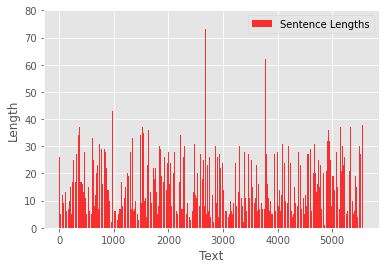

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.ylim(0, 80)
plt.bar(np.arange(0,len(len_of_sent),1),len_of_sent,align='center',alpha=0.8,color='red')
plt.legend(['Sentence Lengths'])
plt.xlabel('Text')
plt.ylabel('Length')
plt.show()
plt.savefig('Senetence_Length_distribution.png')

In [ ]:
n_timesteps = 32
x_pad = pad_sequences(text_seq,padding='post',maxlen = n_timesteps)

In [ ]:
x_pad

array([[  49,  471, 4436, ...,    0,    0,    0],
       [  46,  336, 1499, ...,    0,    0,    0],
       [  47,  489,    8, ...,  392, 2998,    0],
       ...,
       [9007,   60,    8, ...,    0,    0,    0],
       [   5,  534,  114, ...,    0,    0,    0],
       [2687,   61,  465, ...,    0,    0,    0]], dtype=int32)

In [ ]:
embeddings_vector = {}
with open('glove.twitter.27B.25d.txt', encoding="utf8") as f:
  for line in f:
      row = line.split()
      embeddings_vector[row[0]] = np.asarray(row[1:], dtype='float32')
print('Loaded Glove Vectors')

Loaded Glove Vectors


In [ ]:
embedding_dim = 25
embedding_matrix = np.random.random((len(tokenize.word_index) + 1, embedding_dim))
for w,i in tokenize.word_index.items():
  if w in embeddings_vector:
    embedding_matrix[i] = embeddings_vector[w]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pad, label, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(3900, 32) (1672, 32)
(3900, 2) (1672, 2)


CNN

In [ ]:
from tensorflow.keras.layers import Input,Dense,MaxPooling1D, Dropout, Activation, Flatten, Embedding, Conv1D, MaxPool1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from keras import backend as K
K.clear_session()

In [ ]:
def create_model(model_name='CNN_Spam_Classifier'):
  inp_layer = Input(shape=(n_timesteps,),name='Message')
  vocab_size = len(tokenize.word_index) +  1
  emb_layer = Embedding(input_dim = vocab_size,output_dim=embedding_dim,weights=[embedding_matrix],input_length=n_timesteps,trainable=False,name='Embedding')(inp_layer)
  conv_layer_1 = Conv1D(filters=128,kernel_size=2,activation='relu',name='Convolution_Layer_1')(emb_layer)
  pool_layer_1 = MaxPooling1D(5,name='Pooling_Layer_1')(conv_layer_1)
  flat1 = Flatten(name='Flattenned_Layer_1')(pool_layer_1)
  conv_layer_2 = Conv1D(filters=128,kernel_size=3,activation='relu',name='Convolution_Layer_2')(emb_layer)
  pool_layer_2 = MaxPooling1D(5,name='Pooling_Layer_2')(conv_layer_2)
  flat2 = Flatten(name='Flattenned_Layer_2')(pool_layer_2)
  conv_layer_3 = Conv1D(filters=128,kernel_size=4,activation='relu',name='Convolution_Layer_3')(emb_layer)
  pool_layer_3 = MaxPooling1D(5,name='Pooling_Layer_3')(conv_layer_3)
  flat3 = Flatten(name='Flattenned_Layer_3')(pool_layer_3)
  conv_layer_4 = Conv1D(filters=128,kernel_size=5,activation='relu',name='Convolution_Layer_4')(emb_layer)
  pool_layer_4 = MaxPooling1D(5,name='Pooling_Layer_4')(conv_layer_4)
  flat4 = Flatten(name='Flattenned_Layer_4')(pool_layer_4)
  flat = tensorflow.concat([flat1,flat2,flat3,flat4],axis=1,name='Concatenate_Flatten_Layers')
  dense_layer = Dense(256,activation='relu',name='Dense_Layer')(flat)
  dropout_layer = Dropout(0.3,name='Dropout_Layer')(dense_layer)
  output_layer = Dense(2,activation='softmax',name='Output_Layer')(dropout_layer)
  model = Model(inp_layer, output_layer,name=model_name)
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

Model: "CNN_Spam_Classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Message (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 32, 25)       225250      Message[0][0]                    
__________________________________________________________________________________________________
Convolution_Layer_1 (Conv1D)    (None, 31, 128)      6528        Embedding[0][0]                  
__________________________________________________________________________________________________
Convolution_Layer_2 (Conv1D)    (None, 30, 128)      9728        Embedding[0][0]                  
________________________________________________________________________________

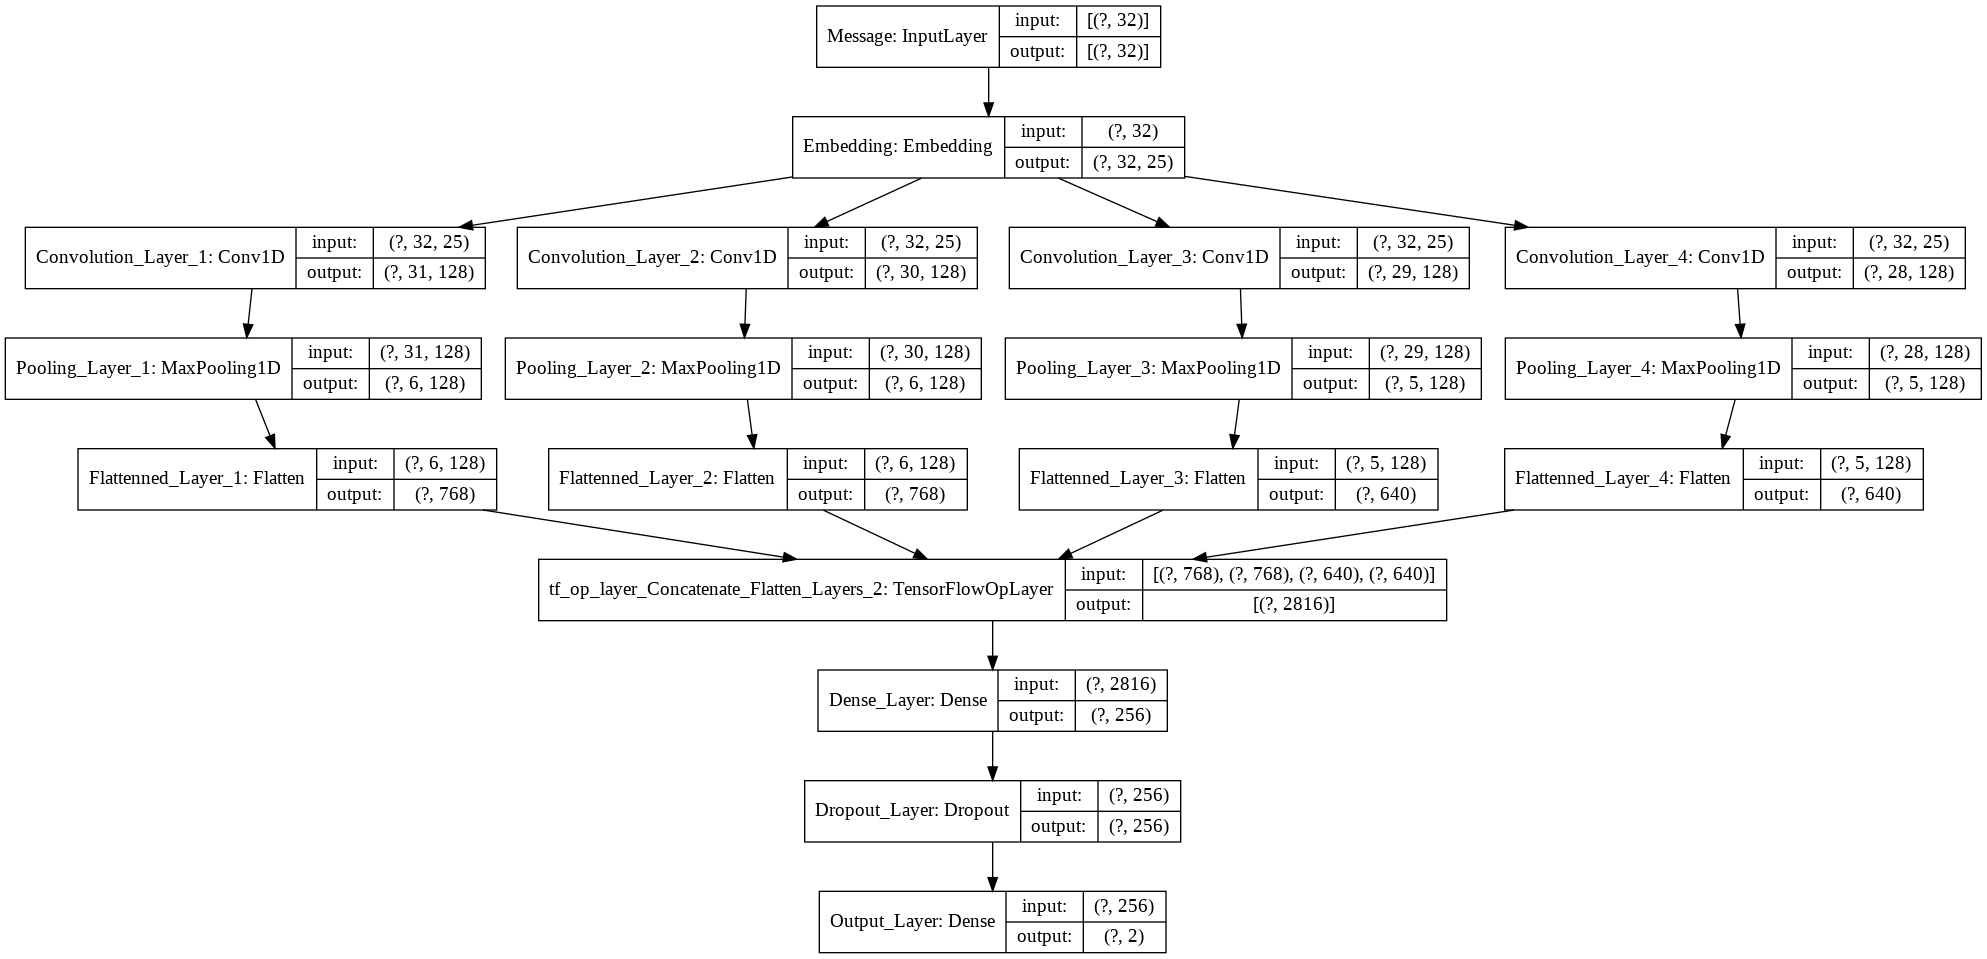

In [ ]:
model = create_model()
model.summary()
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,verbose=1)
filepath = r"/content/drive/My Drive/ML-Assignment/Classifier.h5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
#callbacks_list = [checkpoint,es]
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),callbacks=callbacks_list, epochs=50,batch_size=250, verbose=2)

Epoch 1/50
16/16 - 2s - loss: 0.7796 - accuracy: 0.8446 - val_loss: 0.2294 - val_accuracy: 0.8768
Epoch 2/50
16/16 - 1s - loss: 0.1847 - accuracy: 0.9274 - val_loss: 0.1293 - val_accuracy: 0.9563
Epoch 3/50
16/16 - 1s - loss: 0.1341 - accuracy: 0.9536 - val_loss: 0.1050 - val_accuracy: 0.9611
Epoch 4/50
16/16 - 1s - loss: 0.1056 - accuracy: 0.9641 - val_loss: 0.0890 - val_accuracy: 0.9719
Epoch 5/50
16/16 - 1s - loss: 0.0837 - accuracy: 0.9721 - val_loss: 0.0792 - val_accuracy: 0.9731
Epoch 6/50
16/16 - 1s - loss: 0.0653 - accuracy: 0.9772 - val_loss: 0.0732 - val_accuracy: 0.9767
Epoch 7/50
16/16 - 1s - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0689 - val_accuracy: 0.9779
Epoch 8/50
16/16 - 1s - loss: 0.0456 - accuracy: 0.9851 - val_loss: 0.0624 - val_accuracy: 0.9785
Epoch 9/50
16/16 - 1s - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0644 - val_accuracy: 0.9815
Epoch 10/50
16/16 - 1s - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 11/50
16/16 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

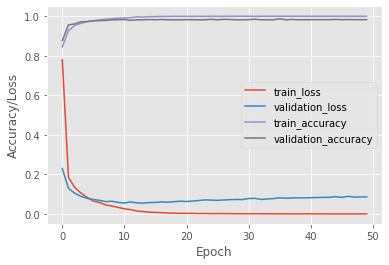

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [ ]:
out = model.predict(X_test)

In [ ]:
Y_pred = np.zeros_like(out)
Y_pred[np.arange(len(Y_pred)), out.argmax(axis = 1)] = 1

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.9826555023923444


Accuracy with CNN is 98.26%

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
cm = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print(classification_report(Y_test,Y_pred,target_names=['ham','spam']))
aucs = roc_auc_score(Y_test, Y_pred)
print(f'ROC AUC: {aucs}')

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1448
        spam       0.94      0.93      0.94       224

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672
 samples avg       0.98      0.98      0.98      1672

ROC AUC: 0.9616836029992107


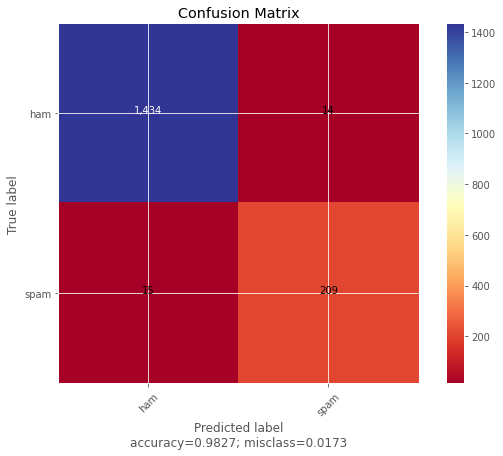

In [ ]:
plot_confusion_matrix(cm=cm,target_names=['ham','spam'],normalize=False,title='Confusion Matrix',cmap='RdYlBu')

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=2
lw = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

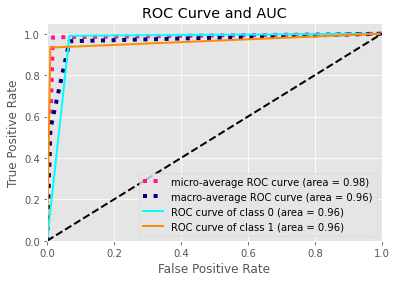

In [ ]:
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC')
plt.legend(loc="lower right")
plt.show()

Using 10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
n_split=10
X = x_pad
Y = label
cvscores = []
for train_index,test_index in KFold(n_split).split(X):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=Y[train_index],Y[test_index]
  model = create_model('K_Fold_Classifier')
  model.fit(x_train, y_train,epochs=10)
  scores = model.evaluate(x_test,y_test)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

Epoch 1/10
157/157 [==============================] - 3s 18ms/step - loss: 0.1655 - accuracy: 0.9438
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0704 - accuracy: 0.9773
Epoch 3/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0439 - accuracy: 0.9872
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0242 - accuracy: 0.9930
Epoch 5/10
157/157 [==============================] - 3s 18ms/step - loss: 0.0130 - accuracy: 0.9960
Epoch 6/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0046 - accuracy: 0.9990
Epoch 7/10
157/157 [==============================] - 3s 18ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 8/10
157/157 [==============================] - 3s 18ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 9/10
157/157 [==============================] - 3s 18ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 10/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy:

In [ ]:
print("Model Accuracy for 10 fold cross validation : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Model Accuracy for 10 fold cross validation : 96.89% (+/- 3.96%)


Accuracy with 10 CV is 96.89%

LSTM

Model: "model_name"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Message (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
Embedding (Embedding)        (None, 32, 25)            225250    
_________________________________________________________________
LSTM_Layer_1 (LSTM)          (None, 32, 256)           288768    
_________________________________________________________________
LSTM_Layer_2 (LSTM)          (None, 128)               197120    
_________________________________________________________________
Dense_Layer (Dense)          (None, 256)               33024     
_________________________________________________________________
Dropout_Layer (Dropout)      (None, 256)               0         
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 5

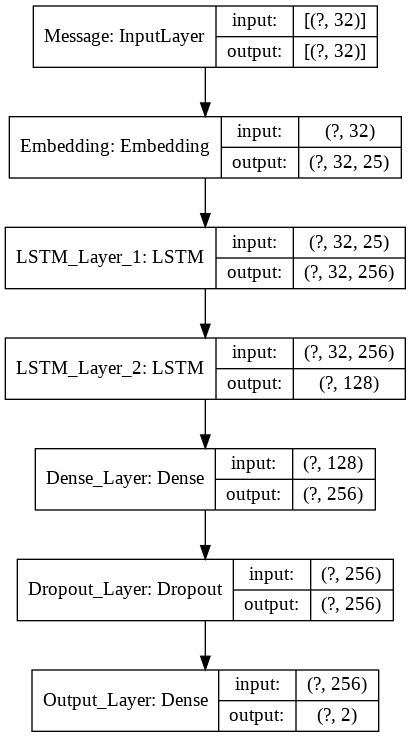

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional
def create_lstm_model(model_name='Simple_LSTM_Classifier'):
  latent_dim = 256
  inp_layer = Input(shape=(n_timesteps,),name='Message')
  vocab_size = len(tokenize.word_index) +  1
  emb_layer = Embedding(input_dim = vocab_size,output_dim=embedding_dim,weights=[embedding_matrix],input_length=n_timesteps,trainable=False,name='Embedding')(inp_layer)
  LSTM_1=LSTM(units = latent_dim,return_sequences=True,name='LSTM_Layer_1',dropout=0.3,recurrent_dropout=0.2)(emb_layer)
  output=LSTM(units = latent_dim//2,return_sequences=False,name='LSTM_Layer_2',dropout=0.3,recurrent_dropout=0.2)(LSTM_1)
  dense_layer = Dense(256,activation='relu',name='Dense_Layer')(output)
  dropout_layer = Dropout(0.3,name='Dropout_Layer')(dense_layer)
  output_layer = Dense(2,activation='softmax',name='Output_Layer')(dropout_layer)
  model = Model(inp_layer, output_layer,name='model_name')
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
model = create_lstm_model()
model.summary()
plot_model(model, to_file='LSTM_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,verbose=1)
filepath = r"/content/drive/My Drive/ML-Assignment/LSTM_Classifier.h5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
#callbacks_list = [checkpoint,es]
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),callbacks=callbacks_list, epochs=50,batch_size=100, verbose=2)

Epoch 1/50
39/39 - 21s - loss: 0.1318 - accuracy: 0.9551 - val_loss: 0.1296 - val_accuracy: 0.9629
Epoch 2/50
39/39 - 21s - loss: 0.1171 - accuracy: 0.9605 - val_loss: 0.0930 - val_accuracy: 0.9695
Epoch 3/50
39/39 - 21s - loss: 0.1048 - accuracy: 0.9667 - val_loss: 0.0842 - val_accuracy: 0.9701
Epoch 4/50
39/39 - 21s - loss: 0.0989 - accuracy: 0.9672 - val_loss: 0.0905 - val_accuracy: 0.9677
Epoch 5/50
39/39 - 21s - loss: 0.0931 - accuracy: 0.9674 - val_loss: 0.0922 - val_accuracy: 0.9749
Epoch 6/50
39/39 - 21s - loss: 0.0822 - accuracy: 0.9721 - val_loss: 0.0966 - val_accuracy: 0.9725
Epoch 7/50
39/39 - 22s - loss: 0.0869 - accuracy: 0.9744 - val_loss: 0.0648 - val_accuracy: 0.9803
Epoch 8/50
39/39 - 21s - loss: 0.0807 - accuracy: 0.9695 - val_loss: 0.0674 - val_accuracy: 0.9773
Epoch 9/50
39/39 - 21s - loss: 0.0856 - accuracy: 0.9715 - val_loss: 0.0592 - val_accuracy: 0.9791
Epoch 10/50
39/39 - 21s - loss: 0.0863 - accuracy: 0.9733 - val_loss: 0.0597 - val_accuracy: 0.9815
Epoch 11/

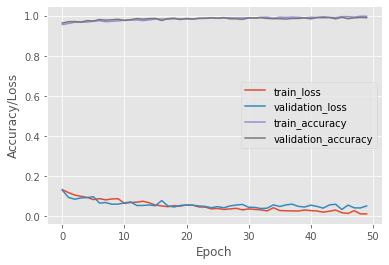

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [ ]:
out = model.predict(X_test)
Y_pred = np.zeros_like(out)
Y_pred[np.arange(len(Y_pred)), out.argmax(axis = 1)] = 1
print(accuracy_score(Y_test,Y_pred))

0.9892344497607656


Accuracy with LSTM is 98.92%

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
cm = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print(classification_report(Y_test,Y_pred,target_names=['ham','spam']))
aucs = roc_auc_score(Y_test, Y_pred)
print(f'ROC AUC: {aucs}')

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.97      0.95      0.96       224

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.98      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672
 samples avg       0.99      0.99      0.99      1672

ROC AUC: 0.9730293014996054


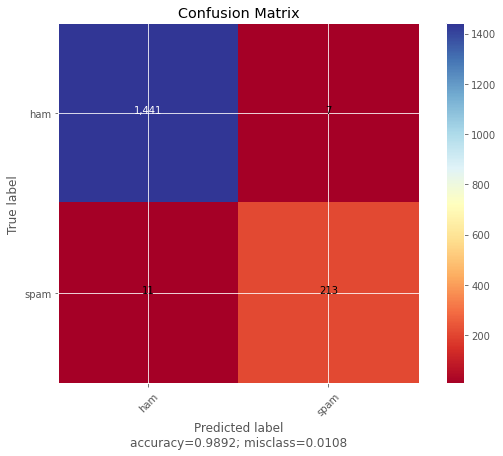

In [ ]:
plot_confusion_matrix(cm=cm,target_names=['ham','spam'],normalize=False,title='Confusion Matrix',cmap='RdYlBu')

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

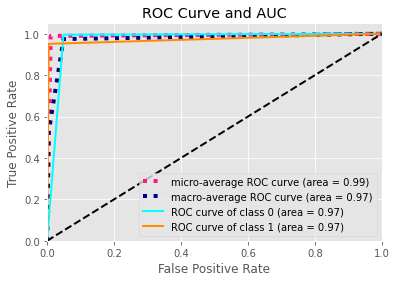

In [ ]:
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC')
plt.legend(loc="lower right")
plt.show()

BiLSTM

In [ ]:
from tensorflow.keras.layers import Input,Dense,Dropout, Activation, Flatten, Embedding,Bidirectional,LSTM
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

Model: "Attention_BiLSTM_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Message (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
Embedding (Embedding)        (None, 32, 25)            225250    
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 512)           577536    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 256)           656384    
_________________________________________________________________
attention (attention)        (None, 256)               288       
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 514       
Total params: 1,459,972
Trainable params: 1,234,722
Non-trainable params: 225,250
_______________________

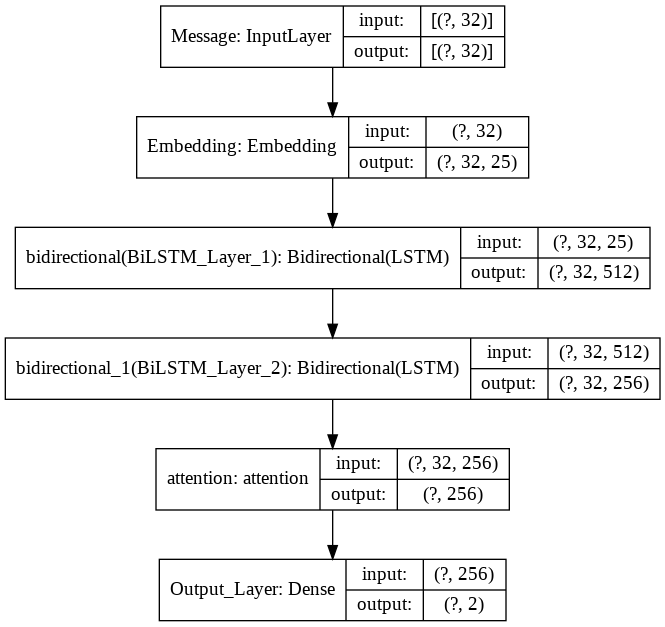

In [ ]:
def create_attention_lstm_model(model_name='Attention_BiLSTM_Classifier'):
  latent_dim = 256
  inp_layer = Input(shape=(n_timesteps,),name='Message')
  vocab_size = len(tokenize.word_index) +  1
  emb_layer = Embedding(input_dim = vocab_size,output_dim=embedding_dim,weights=[embedding_matrix],input_length=n_timesteps,trainable=False,name='Embedding')(inp_layer)
  BiLSTM_1=Bidirectional(LSTM(units = latent_dim,return_sequences=True,name='BiLSTM_Layer_1',dropout=0.3,recurrent_dropout=0.2))(emb_layer)
  att_in=Bidirectional(LSTM(units = latent_dim//2,return_sequences=True,name='BiLSTM_Layer_2',dropout=0.3,recurrent_dropout=0.2))(BiLSTM_1)
  att_out = attention()(att_in)
  output_layer = Dense(2,activation='softmax',name='Output_Layer')(att_out)
  model = Model(inp_layer,output_layer,name=model_name)
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
model = create_attention_lstm_model()
model.summary()
plot_model(model, to_file='Attention_BiLSTM_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,verbose=1)
filepath = r"/content/drive/My Drive/DL-Assignment/Attention_BiLSTM_Classifier.h5"
checkpoint = ModelCheckpoint(filepath=filepath, save_weights_only=False,monitor='val_accuracy',mode='max',save_best_only=True)
#callbacks_list = [checkpoint,es]
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),callbacks=callbacks_list, epochs=50,batch_size=100, verbose=2)

Epoch 1/50
39/39 - 54s - loss: 0.2049 - accuracy: 0.9174 - val_loss: 0.1160 - val_accuracy: 0.9551
Epoch 2/50
39/39 - 53s - loss: 0.1121 - accuracy: 0.9597 - val_loss: 0.0871 - val_accuracy: 0.9719
Epoch 3/50
39/39 - 53s - loss: 0.1011 - accuracy: 0.9646 - val_loss: 0.0696 - val_accuracy: 0.9731
Epoch 4/50
39/39 - 52s - loss: 0.0875 - accuracy: 0.9710 - val_loss: 0.0984 - val_accuracy: 0.9689
Epoch 5/50
39/39 - 53s - loss: 0.0973 - accuracy: 0.9651 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 6/50
39/39 - 53s - loss: 0.0782 - accuracy: 0.9710 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 7/50
39/39 - 52s - loss: 0.0733 - accuracy: 0.9746 - val_loss: 0.0690 - val_accuracy: 0.9761
Epoch 8/50
39/39 - 52s - loss: 0.0722 - accuracy: 0.9749 - val_loss: 0.0755 - val_accuracy: 0.9743
Epoch 9/50
39/39 - 53s - loss: 0.0705 - accuracy: 0.9759 - val_loss: 0.0528 - val_accuracy: 0.9815
Epoch 10/50
39/39 - 53s - loss: 0.0609 - accuracy: 0.9795 - val_loss: 0.0520 - val_accuracy: 0.9856
Epoch 11/

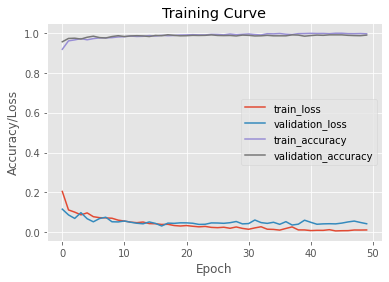

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.title('Training Curve')
plt.legend()
plt.show()

In [ ]:
out = model.predict(X_test)
Y_pred = np.zeros_like(out)
Y_pred[np.arange(len(Y_pred)), out.argmax(axis = 1)] = 1
print(accuracy_score(Y_test,Y_pred))

0.9886363636363636


Accuracy with BiLSTM is 98.86%

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
cm = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
print(classification_report(Y_test,Y_pred,target_names=['ham','spam']))
aucs = roc_auc_score(Y_test, Y_pred)
print(f'ROC AUC: {aucs}')

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1448
        spam       0.96      0.96      0.96       224

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.98      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672
 samples avg       0.99      0.99      0.99      1672

ROC AUC: 0.9745708366219417


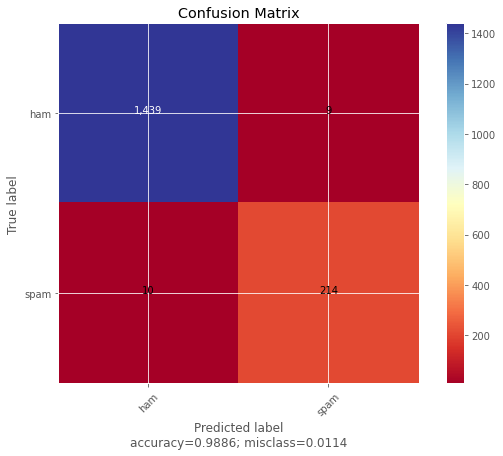

In [ ]:
plot_confusion_matrix(cm=cm,target_names=['ham','spam'],normalize=False,title='Confusion Matrix',cmap='RdYlBu')

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

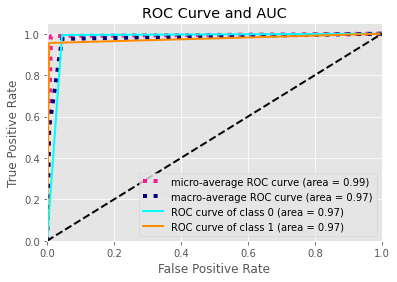

In [ ]:
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC')
plt.legend(loc="lower right")
plt.show()